<a href="https://colab.research.google.com/github/Funmiadebajo/GIS/blob/main/PS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Shared Housing as a Solution to Intergenerational Homelessness in Camden City, Camden NJ**



According to Monarch Housing, (2024) Camden City with a poverty rate of 36%, contributed nearly 68% to the homeless population in New Jersey in the January 2024 Point-in-Time Counts. Based on this to recent counts, Camden County's unsheltered homeless count has surged, with more than 84% of the county's unsheltered individuals residing in Camden City alone.

Of particular concern is the demographic composition of Camden's homeless population, as 316 individuals fall within the 18 to 44 age range—a vibrant group whose potential contributions to economic development are hindered by the destabilizing effects of homelessness(Monarch Housing, 2024). The constant stress of survival in unstable housing situations leads to chronic physical and mental health conditions, low educational attainment, and difficulties in securing long-term employment (Shinn et al., 2005).

The Corporation for Supportive Housing (2015) estimated that without intervention, 50% of those experiencing homelessness for the first time will have additional episodes. There is therefore an urgent need for innovative and proactive "prevention-as-cure" approaches to address this crisis to alter the trajectory of homelessness for future generations significantly.


**Research Objective**
To explore the potential of formal shared housing program for single adults at risk of homelessness in Camden, NJ.

Starting with single (non-coupled) persons allows the County to test and refine it develop a pilot program before expanding to other demographics. By addressing the specific needs and challenges of single individuals first, the program can gather valuable insights and data that will be crucial for scaling up and adapting the program to include families, seniors, or other groups in the future.

In [28]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify
import seaborn as sns

In [29]:
pip install contextily

In [30]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

import re
from matplotlib.colors import ListedColormap


#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [31]:
#!python --version
gpd.__version__

'1.0.1'

#HOMELESSNESS: A VISIBLE INDICATOR OF URBAN POVERTY

Homelessness is one of the most visible indicators of urban poverty across America. While poverty and homelessness are closely linked, they are distinct issues. The U.S. Department of Housing and Urban Development (HUD) defines homelessness as individuals and families who lack a fixed, regular, and adequate nighttime residence. This includes those living in shelters, transitional Housing, or places not meant for human habitation (U.S. Department of Housing and Urban Development, 2019).

Intergenerational homelessness occurs when families that experience homelessness pass these conditions onto younger generations, creating a self-perpetuating cycle.
A large body of academic research shows that increasing housing costs is the most basic macroeconomic cause of homelessness. When median rents increase by $100, homelessness rates rise by nine percent; and about 74% of highly low-income renters pay above 50% of their income on rent. (Horowitz et al., 2023, National Alliance to End Homelessness, 2024).


# Causes of Homelessness in Camden County

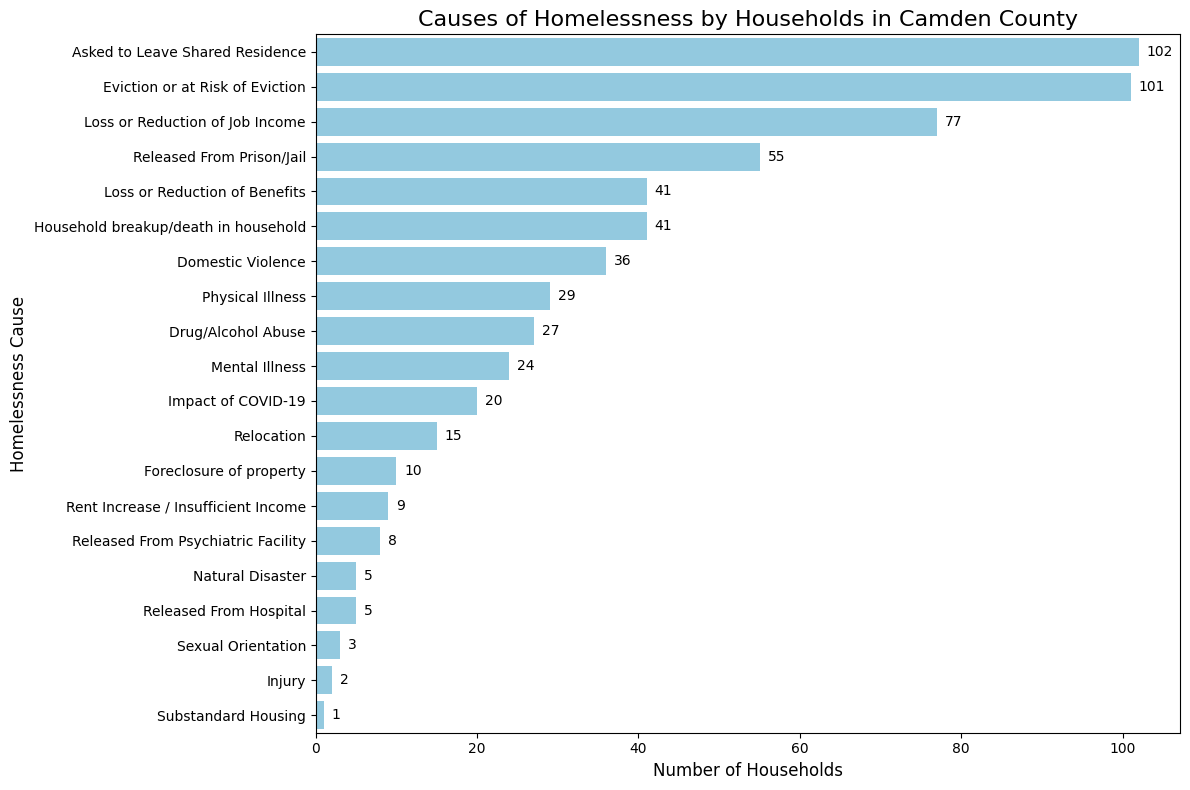

In [32]:
# Read the data from the provided URL
url = 'https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/inus%20condition1.xlsx'
data = pd.read_excel(url)

# Sort the data based on 'Households' in descending order
data_sorted = data.sort_values(by='Households', ascending=False)

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a horizontal bar chart using Seaborn
sns.barplot(
    data=data_sorted,
    y='Homelessness Cause ',  # Causes on the Y-axis for better label alignment
    x='Households',
    color='skyblue'
)

# Add labels for each bar
for index, value in enumerate(data_sorted['Households']):
    plt.text(value + 1, index, f'{value}', va='center')  # Annotate each bar

# Customize the chart
plt.title('Causes of Homelessness by Households in Camden County', fontsize=16)
plt.xlabel('Number of Households', fontsize=12)
plt.ylabel('Homelessness Cause', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show();


### 5-Year Comparison of Total Homeless Population by Housing Situation across Camden County, New Jersey

On the night of January 23, 2024, a total of 743 persons in 619 households were experiencing homelessness in Camden County. This data indicates that Camden County has seen an overall increase of 110 identified persons (17%) from 2020 to 2024, as well as a gradual increase in the population of unsheltered homeless persons between 2021 and 2024 (Monarch Housing, 2024).

The demographic and economic conditions in Camden County are directly linked to the housing situation. Potential renters are often unable to secure housing due to their economic circumstances. Between 2021 and 2023, the median rental price increased by $450, while the median household income only rose by 175 (Camden County, NJ - Data USA). This disparity highlights the significant challenge faced by many residents in affording housing.
The following charts visualize the patterns and trends of homelessness types over a period of five years. It also provides evidence-based recommendations for Shared Housing as a potential prevention and solution for homelessness in Camden County, given the economic and demographic realities of the area.

Index(['Year', 'Emergency Shelter', 'Unsheltered', 'Transitional Housing',
       'Safe Haven', 'Total'],
      dtype='object')


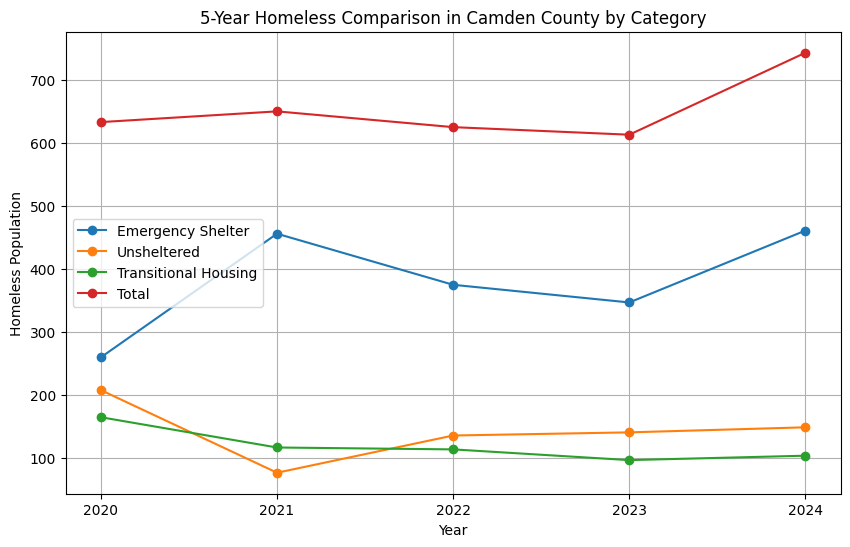

In [33]:

# Load the data from the raw Excel file
CountyFive = pd.read_excel('https://raw.githubusercontent.com/Funmiadebajo/GIS/main/5%20year%20homeless%20comparison.xlsx', engine='openpyxl')

# Strip whitespace from the column names
CountyFive.columns = CountyFive.columns.str.strip()

# Convert the 'Year' column to integers
CountyFive['Year'] = CountyFive['Year'].astype(int)

# Check the cleaned column names
print(CountyFive.columns)

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot each category against the Year
plt.plot(CountyFive['Year'], CountyFive['Emergency Shelter'], marker='o', label='Emergency Shelter')
plt.plot(CountyFive['Year'], CountyFive['Unsheltered'], marker='o', label='Unsheltered')
plt.plot(CountyFive['Year'], CountyFive['Transitional Housing'], marker='o', label='Transitional Housing')
plt.plot(CountyFive['Year'], CountyFive['Total'], marker='o', label='Total')

# Set titles and labels
plt.title('5-Year Homeless Comparison in Camden County by Category')
plt.xlabel('Year')
plt.ylabel('Homeless Population')
plt.xticks(CountyFive['Year'])  # Set x-ticks to be the year values
plt.legend()
plt.grid(True)

# Show the plot
plt.show();


# Relationship Between Median Gross Rent and Homelssness in Camden County

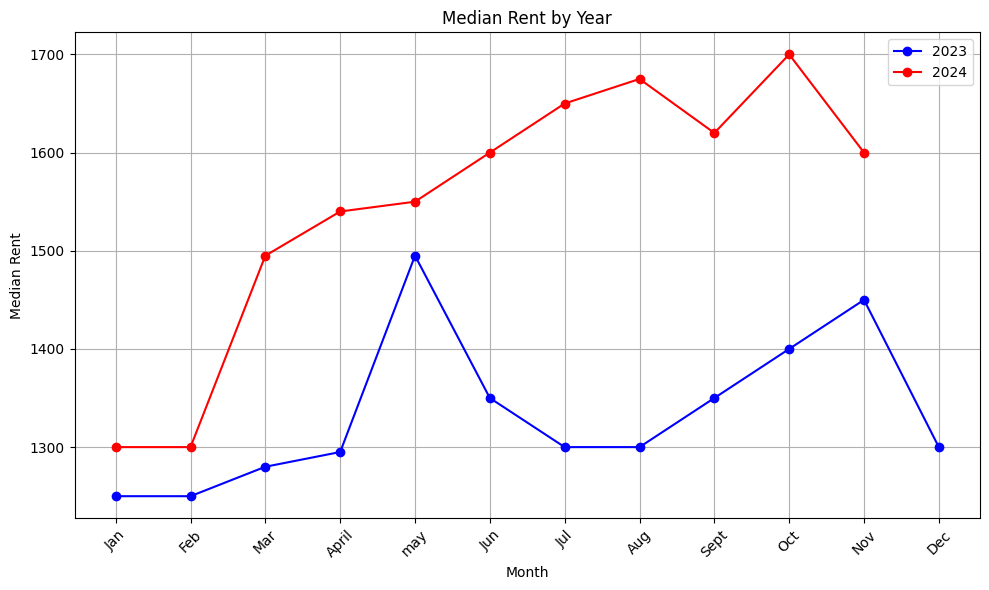

In [34]:

# Load the data from the provided URL
data = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/median%20rental%20by%20year.xlsx')

# Plot a line graph
plt.figure(figsize=(10, 6))

# Plotting '2023' and '2024' median rent values against 'Month' (use integer column names)
plt.plot(data['Month'], data[2023], marker='o', linestyle='-', color='b', label='2023')
plt.plot(data['Month'], data[2024], marker='o', linestyle='-', color='r', label='2024')

# Adding labels and title
plt.title('Median Rent by Year')
plt.xlabel('Month')
plt.ylabel('Median Rent')
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the month labels for better readability
plt.tight_layout()
plt.show();


# Homelessness In Camden City, Camden NJ

Camden City is a critical intersection where high population density, poverty, and homelessness converge in Camden County, highlighting systemic socio-economic challenges. The maps below show high population densities in areas like Camden City, Pennsauken Township, and Cherry Hill Township, all of which are areas of significant residential activity. Camden City and Pennsauken are both marked by high poverty rates, emphasizing the strong relationship between high poverty and population density.

Homelessness is notably concentrated in Camden City, closely aligned with its high poverty rates. This suggests that homelessness is not only linked to population density but is also driven primarily by economic challenges, such as poverty.


**Load and Clean Data from Excel**

In [35]:
# Load and clean the Camden County municipalities shapefile
njMun = gpd.read_file('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality.zip')
njMun.rename(columns={'NAMELSAD': 'Municipality'}, inplace=True)
# List of municipalities to keep unchanged
keep_unchanged = ["Berlin borough", "Berlin township", "Gloucester City", "Gloucester township"]

# Function to clean municipality names
def clean_municipality(name):
    name = name.strip()
    if name in keep_unchanged:
        return name
    if name == "Gloucester City city":
        return "Gloucester City"
    return ' '.join(word for word in name.split() if word.lower() not in ['borough', 'township'])

# Apply the cleaning function
njMun['Municipality'] = njMun['Municipality'].apply(clean_municipality)
njMun['Municipality'] = njMun['Municipality'].str.title()
#print(njMun['Municipality'])
#njMun.head(20)

In [36]:
# Load the Research ACS Data from SOcial Explorer and 2024 PIT Count
import geopandas as gpd
research_data = gpd.read_file('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/research_data.csv')
research_data = research_data.rename(columns={'Municipality': 'ignore', 'Statistics': 'Municipality'})
#print(research_data.columns)
#research_data.head(20)

#took out a njmun shapefile code from here similar to the one above. i kept it in chatgpt.

In [37]:
from shapely.validation import make_valid

# Step 1: Normalize keys for a consistent merge
njMun['Municipality'] = njMun['Municipality'].str.strip().str.lower()
research_data['Municipality'] = research_data['Municipality'].str.strip().str.lower()

# Step 2: Merge datasets with an outer join
merged_data = njMun.merge(research_data, on='Municipality', how='outer', indicator=True)

# Step 3: Validate geometries in `njMun`
merged_data['geometry'] = merged_data['geometry'].apply(lambda geom: make_valid(geom) if geom else None)

# Step 4: Convert numeric columns to proper dtypes (if applicable)
# Convert all non-geometry columns from research_data to numeric if possible
numeric_columns = research_data.columns.difference(['Municipality'])
for col in numeric_columns:
    if col in merged_data.columns:
        merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Step 5: Handle missing values
# Replace missing values in numeric columns with 0 for analysis
for col in numeric_columns:
    if col in merged_data.columns and merged_data[col].dtype in [float, int]:
        merged_data[col] = merged_data[col].fillna(0)

# Step 6: Handle missing geometries
# Fill missing geometries with empty geometries or exclude if not necessary
merged_data = merged_data[merged_data['geometry'].notnull()]

# Step 7: Reset the GeoDataFrame index
merged_data = merged_data.reset_index(drop=True)

# Step 8: (Optional) Compute centroids for easier plotting/labeling later
merged_data['centroid'] = merged_data['geometry'].centroid

merged_data['Municipality'] = merged_data['Municipality'].str.title()

# Step 9: Verify the merged dataset
#print(merged_data.info());  # Summary of the merged data
#print(merged_data.head());  # Preview the first few rows


In [38]:
#merged_data.columns

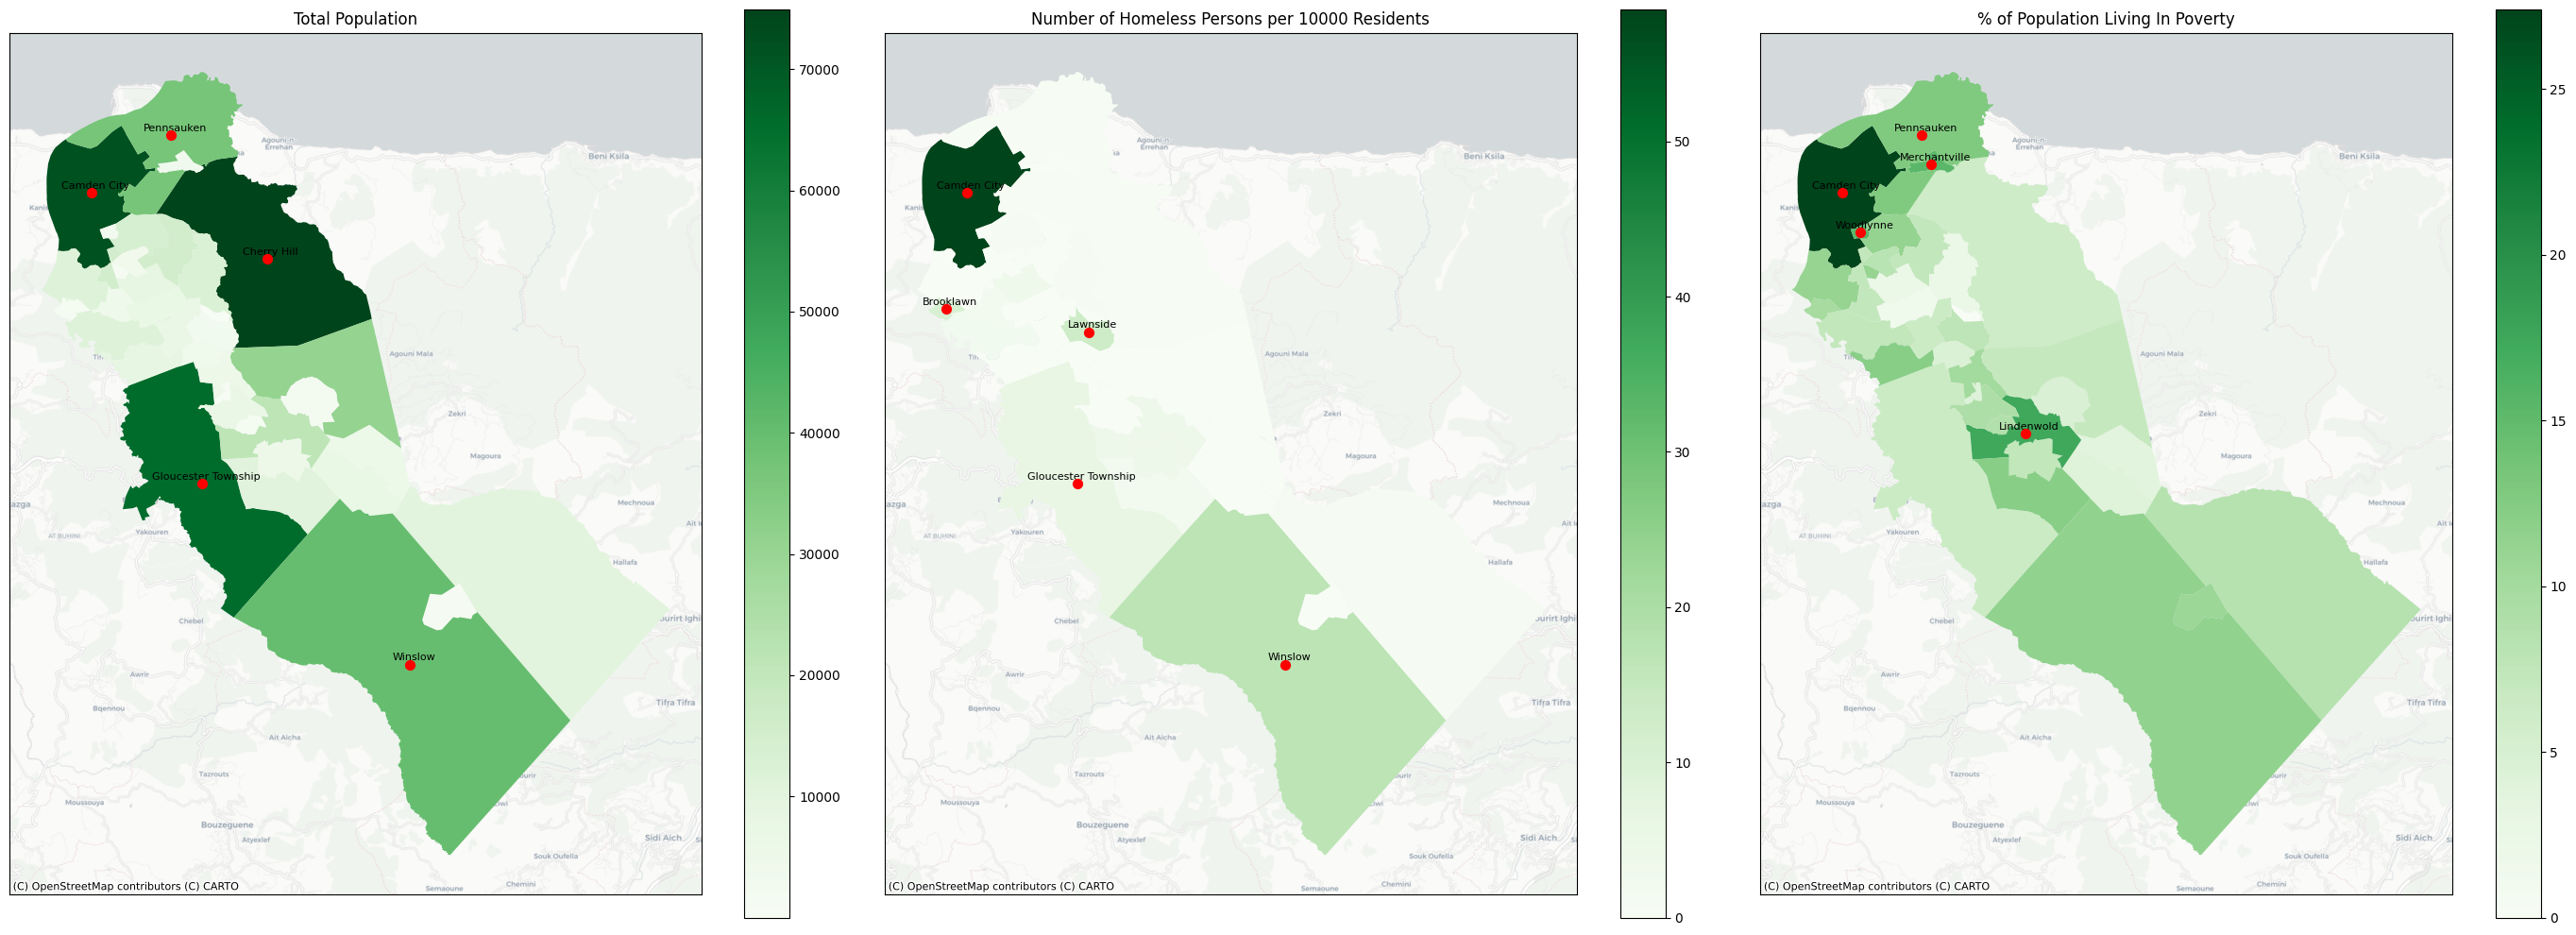

In [39]:
import contextily as cx
if not merged_data.crs or merged_data.crs.is_geographic:
    merged_data = merged_data.to_crs(epsg=3857)

# Convert relevant columns to numeric types, handling missing values
columns_to_numeric = [
    'Total Population',
    'Homelessness per 10000',
    'Living In Poverty',
]
for col in columns_to_numeric:
    if col in merged_data.columns:
        merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Drop rows where key metrics are NaN to ensure valid sorting and plotting
cleaned_data = merged_data.dropna(subset=columns_to_numeric, how='any')

# Get top 5 municipalities for each metric after ensuring numeric conversion
top_5_pop = cleaned_data.nlargest(5, 'Total Population')
top_5_homeless = cleaned_data.nlargest(5, 'Homelessness per 10000')
top_5_poverty = cleaned_data.nlargest(5, 'Living In Poverty')

# Function to annotate top 5 municipalities on each map
def annotate_top_5(ax, top_5_data):
    for idx, row in top_5_data.iterrows():
        # Ensure centroids are computed on valid geometries
        if row.geometry.is_valid:
            centroid = row.geometry.centroid
            ax.annotate(
                row['Municipality'],
                xy=(centroid.x, centroid.y),
                xytext=(3, 3),
                textcoords="offset points",
                fontsize=8,
                ha='center',
                color='black'
            )
            ax.scatter(centroid.x, centroid.y, color='red', s=50, zorder=5)

fig, axes = plt.subplots(1, 3, figsize=(28, 10))

# Total Population
cleaned_data.plot(
    column='Total Population', cmap='Greens', legend=True, ax=axes[0],
    missing_kwds={'color': 'lightgrey'}
)
axes[0].set_title('Total Population')
annotate_top_5(axes[0], top_5_pop)
cx.add_basemap(axes[0], source=cx.providers.CartoDB.Positron)
axes[0].set_xticks([])
axes[0].set_yticks([])

# Homelessness per 10000
cleaned_data.plot(
    column='Homelessness per 10000', cmap='Greens', legend=True, ax=axes[1],
    missing_kwds={'color': 'lightgrey'}
)
axes[1].set_title('Number of Homeless Persons per 10000 Residents')
annotate_top_5(axes[1], top_5_homeless)
cx.add_basemap(axes[1], source=cx.providers.CartoDB.Positron)
axes[1].set_xticks([])
axes[1].set_yticks([])

# Living In Poverty
cleaned_data.plot(
    column='Living In Poverty', cmap='Greens', legend=True, ax=axes[2],
    missing_kwds={'color': 'lightgrey'}
)
axes[2].set_title('% of Population Living In Poverty')
annotate_top_5(axes[2], top_5_poverty)
cx.add_basemap(axes[2], source=cx.providers.CartoDB.Positron)
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.tight_layout()
plt.show();

# Homelessness as a function of income and housing Availability

This histogram portrays a diverse economic landscape within the county. The wide range of the histogram spanning from 180,000 DOllars highlights the income disparity within the county. The right skewed distribution signifies that most median household income are clustered around the lower end of the spectrum. The outliers are the few municipalities with median incomes exceeding 160,000 Doll. The peak of the histogram which falls between 60,000 and 80,000 indicates the most common median incomes across the county.

These numbers are vaulable for understanding the rental situation in correlation to homelss statistics.







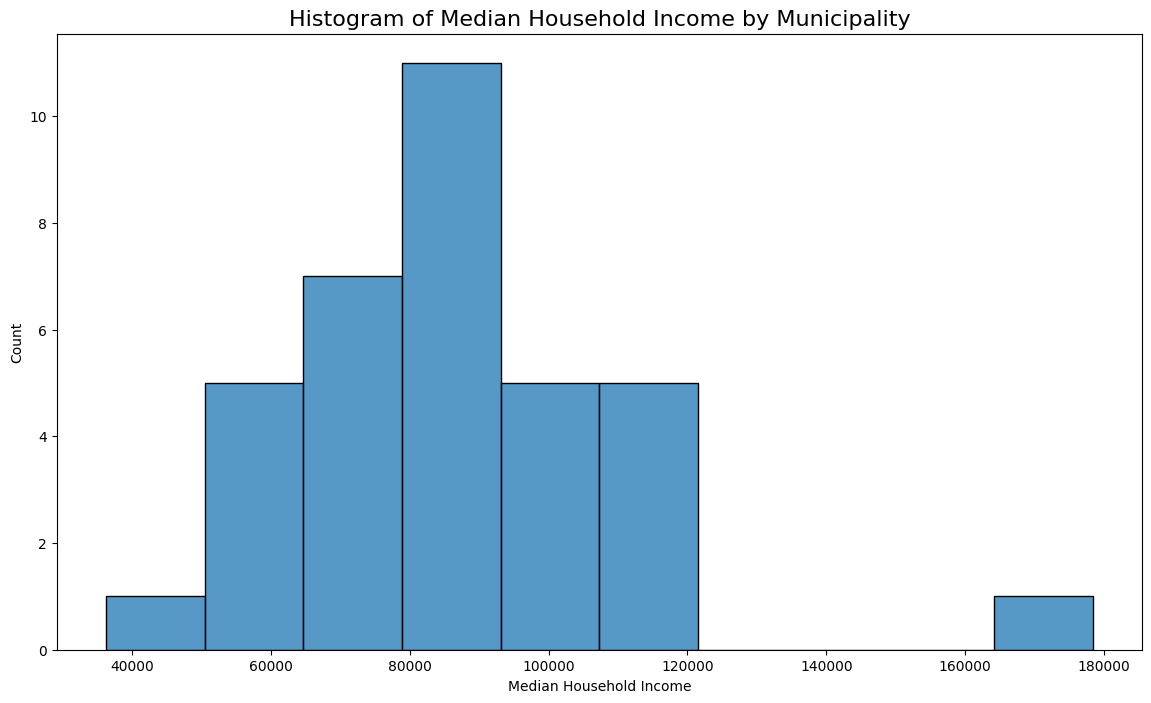

In [40]:
research_data = pd.read_csv('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/research_data.csv')
median_household_income = research_data['Median Household Income'].dropna()
plt.figure(figsize = (14, 8))
plt.title('Histogram of Median Household Income by Municipality', fontsize=16)
sns.histplot(median_household_income)
sns.set_style("darkgrid");

### **Relationship between Median Gross Rent, Actual Number of Renters and Total Vacancies**

These maps show the interaction between these three independent variables, providing a nuanced view of housing dynamics across the municipalities.

The demographic and economic conditions in Camden County are closely intertwined with the region’s housing challenges, as many potential renters face significant difficulty securing affordable housing due to economic constraints. Between 2021 and 2023, the median rental price in Camden increased by $450, while the median household income rose by only, 175 (Camden County, NJ - Data USA

The high vacancy rate and low numbers of renters in Camden City indicate a mismatch between housing availability and affordability.

This also points to a need for targeted policies that address both the affordability and quality of available rental housing to prevent further housing crises.










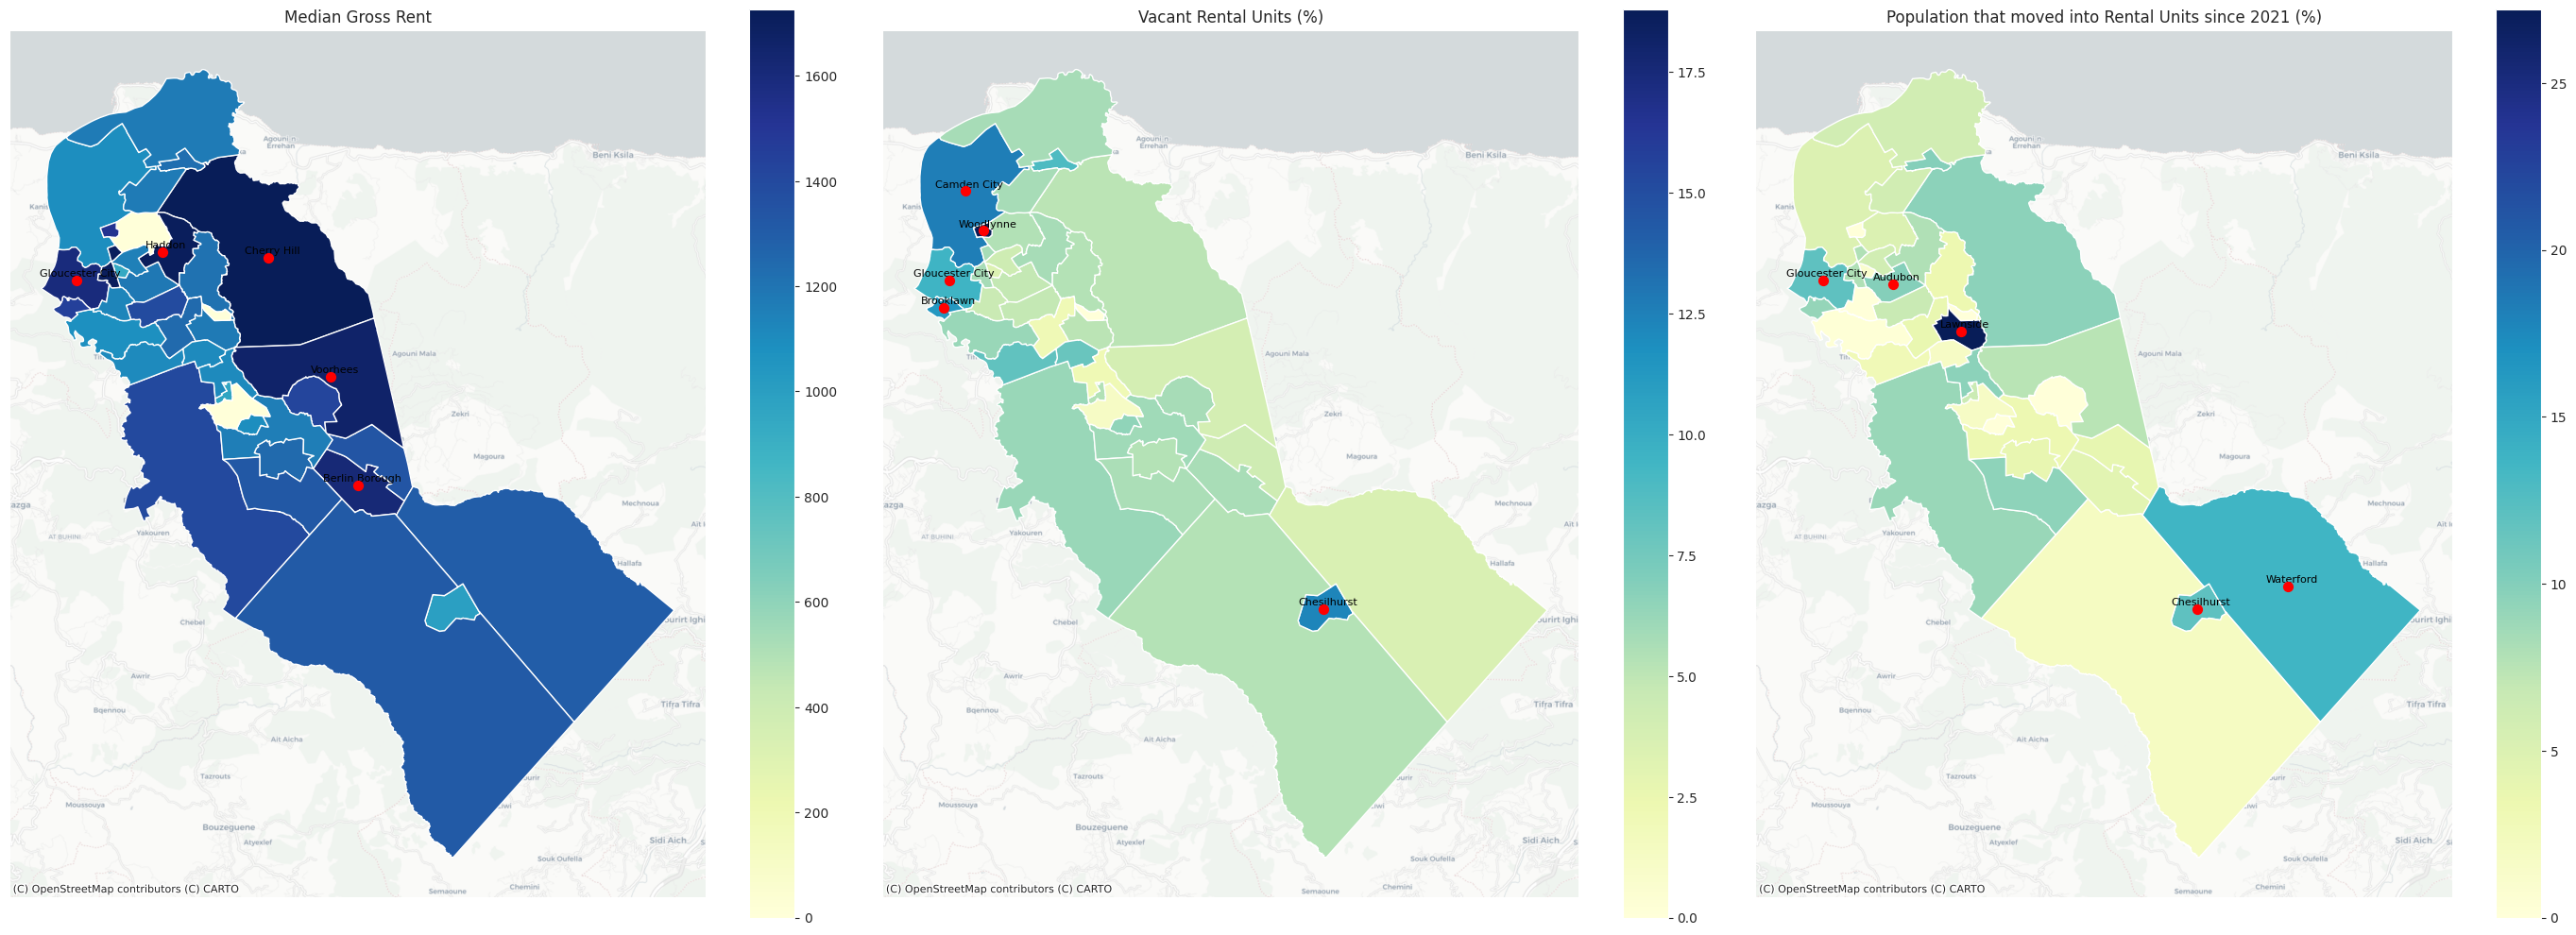

In [45]:
if not merged_data.crs or merged_data.crs.is_geographic:
    merged_data = merged_data.to_crs(epsg=3857)

# Convert relevant columns to numeric types, handling missing values
columns_to_numeric = [
    'Median Gross Rent',
    'Actual Renters',
    'Vacant Units'
]
for col in columns_to_numeric:
    if col in merged_data.columns:
        merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Drop rows where key metrics are NaN to ensure valid sorting and plotting
cleaned_data = merged_data.dropna(subset=columns_to_numeric, how='any')

# Get top 5 municipalities for each metric after ensuring numeric conversion
top_5_rent = cleaned_data.nlargest(5, 'Median Gross Rent')
top_5_actual_renters = cleaned_data.nlargest(5, 'Actual Renters')
top_5_vacancies = cleaned_data.nlargest(5, 'Vacant Units')

# Function to annotate top 5 municipalities on each map
def annotate_top_5(ax, top_5_data):
    for idx, row in top_5_data.iterrows():
        # Ensure centroids are computed on valid geometries
        if row.geometry.is_valid:
            centroid = row.geometry.centroid
            ax.annotate(
                row['Municipality'],
                xy=(centroid.x, centroid.y),
                xytext=(3, 3),
                textcoords="offset points",
                fontsize=8,
                ha='center',
                color='black'
            )
            ax.scatter(centroid.x, centroid.y, color='red', s=50, zorder=5)

# Plot Task C: Median Gross Rent, Actual Renters, Vacancies
fig, axes = plt.subplots(1, 3, figsize=(28, 10))

# Median Gross Rent
cleaned_data.plot(
    column='Median Gross Rent', cmap='YlGnBu', legend=True, ax=axes[0],
    missing_kwds={'color': 'lightgrey'}
)
axes[0].set_title("Median Gross Rent")
annotate_top_5(axes[0], top_5_rent)
cx.add_basemap(axes[0], source=cx.providers.CartoDB.Positron)
axes[0].set_xticks([])
axes[0].set_yticks([])

# Vacancies (previously the third plot, now the second)
cleaned_data.plot(
    column='Vacant Units', cmap='YlGnBu', legend=True, ax=axes[1],
    missing_kwds={'color': 'lightgrey'}
)
axes[1].set_title("Vacant Rental Units (%)")
annotate_top_5(axes[1], top_5_vacancies)
cx.add_basemap(axes[1], source=cx.providers.CartoDB.Positron)
axes[1].set_xticks([])
axes[1].set_yticks([])

# Actual Renters (previously the second plot, now the third)
cleaned_data.plot(
    column='Actual Renters', cmap='YlGnBu', legend=True, ax=axes[2],
    missing_kwds={'color': 'lightgrey'}
)
axes[2].set_title("Population that moved into Rental Units since 2021 (%)")
annotate_top_5(axes[2], top_5_actual_renters)
cx.add_basemap(axes[2], source=cx.providers.CartoDB.Positron)
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.tight_layout()
plt.show();


Notes: Median Gross rent data is not available for Collingswood, Stratford and Travistock hence they appear white in map 1.


# Relationship Between Median Household Income,Rent Burden, and Homelessness per 10,000

These maps show how income levels and housing costs intersect to affect housing stability. Families are considered "rent burdened" if they spend more than 30 percent of their income on housingThe low median income and population of people paying more than 30% of their income as rent in Camden City are key contributors to its increased homelessness rates, as individuals may struggle to afford housing.

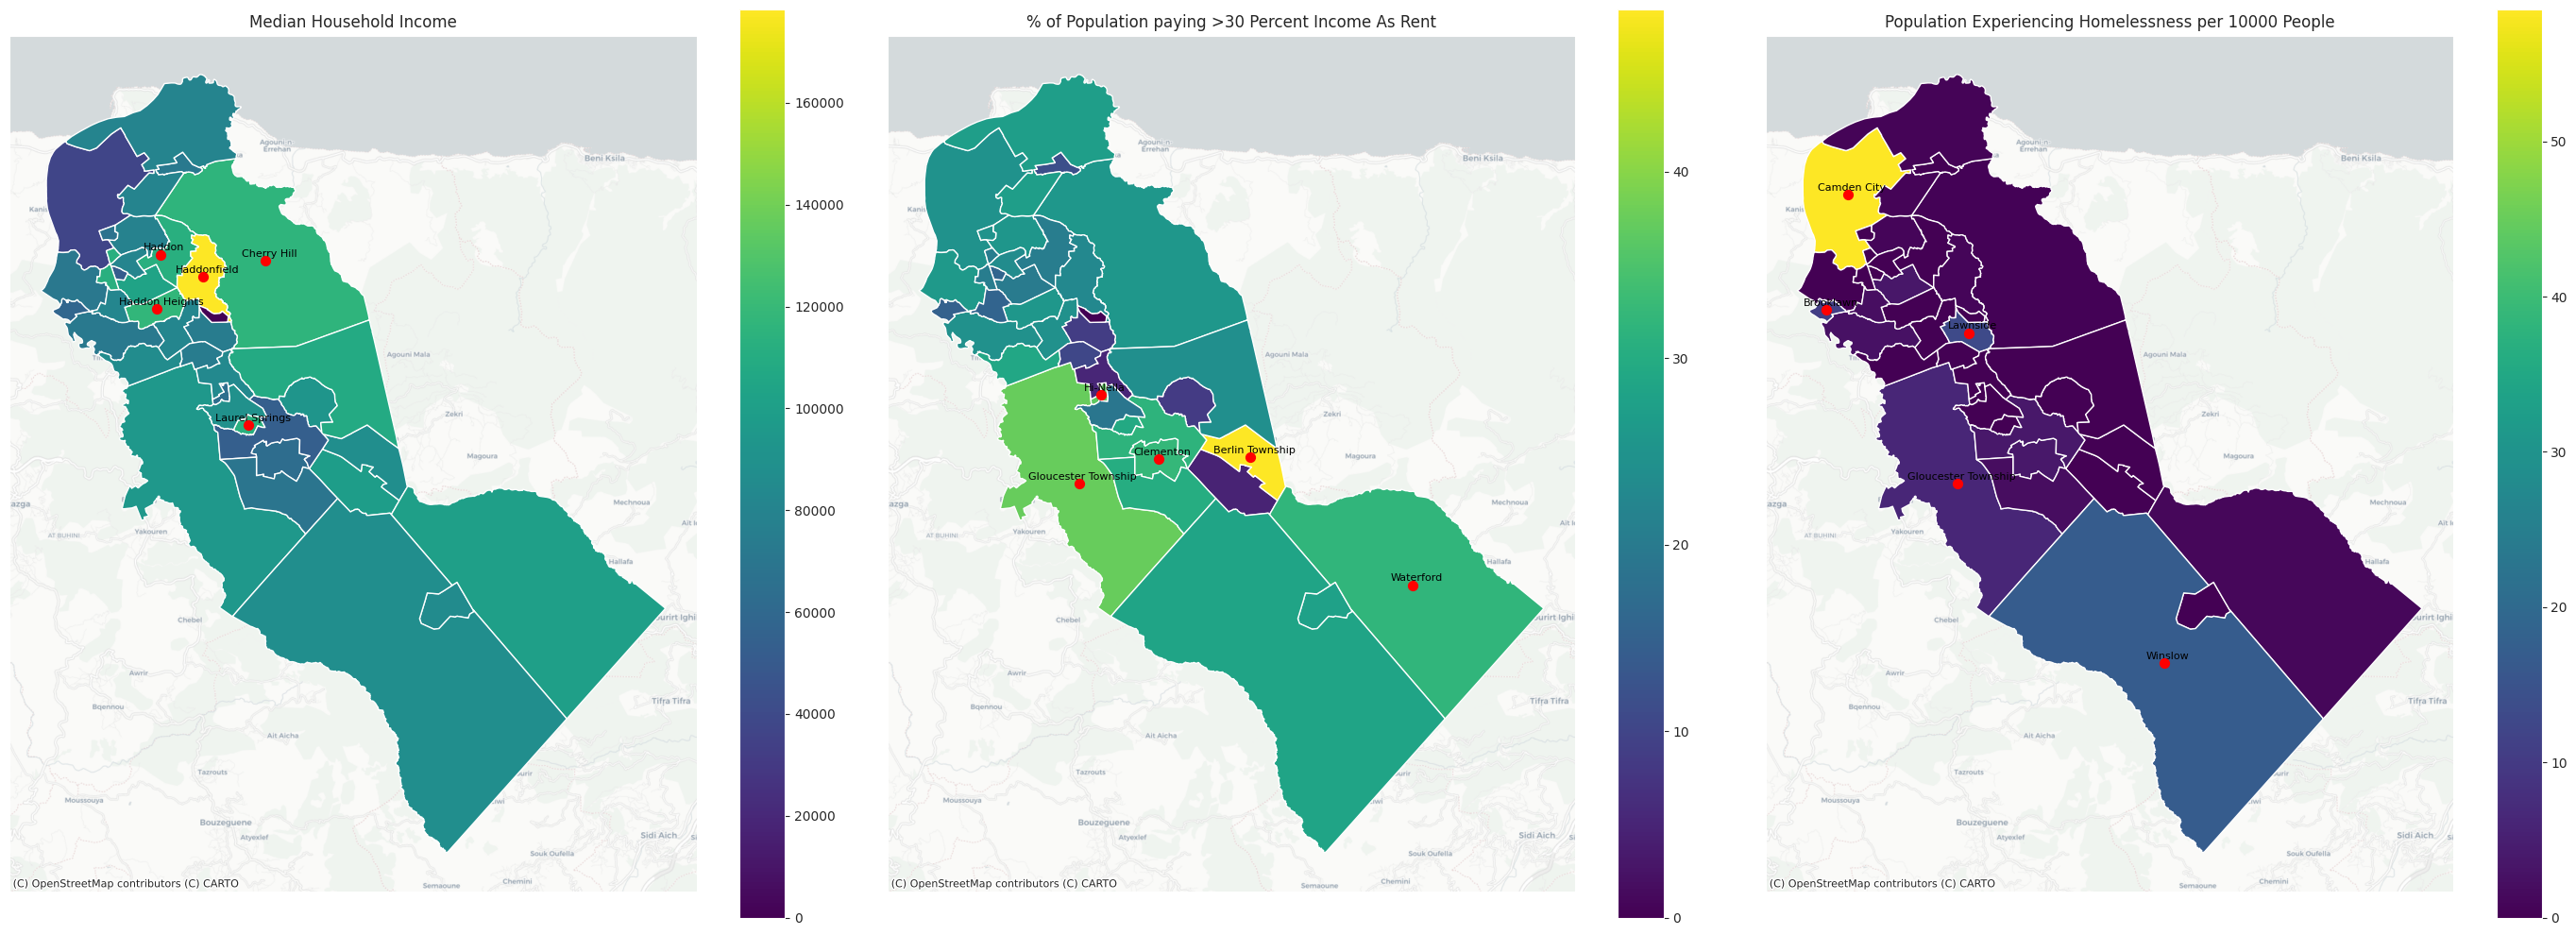

In [43]:

if not merged_data.crs or merged_data.crs.is_geographic:
    merged_data = merged_data.to_crs(epsg=3857)

# Convert relevant columns to numeric types, handling missing values
columns_to_numeric = [
    'Median Household Income',
    '30 Percent Income As Rent',
    'Homelessness per 10000'
]
for col in columns_to_numeric:
    if col in merged_data.columns:
        merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Drop rows where key metrics are NaN to ensure valid sorting and plotting
cleaned_data = merged_data.dropna(subset=columns_to_numeric, how='any')

# Get top 5 municipalities for each metric after ensuring numeric conversion
top_5_income = cleaned_data.nlargest(5, 'Median Household Income')
top_5_rent_burden = cleaned_data.nlargest(5, '30 Percent Income As Rent')
top_5_homelessness = cleaned_data.nlargest(5, 'Homelessness per 10000')

# Function to annotate top 5 municipalities on each map
def annotate_top_5(ax, top_5_data):
    for idx, row in top_5_data.iterrows():
        # Ensure centroids are computed on valid geometries
        if row.geometry.is_valid:
            centroid = row.geometry.centroid
            ax.annotate(
                row['Municipality'],
                xy=(centroid.x, centroid.y),
                xytext=(3, 3),
                textcoords="offset points",
                fontsize=8,
                ha='center',
                color='black'
            )
            ax.scatter(centroid.x, centroid.y, color='red', s=50, zorder=5)

# Plot Task C: Median Household Income, 30 Percent Income As Rent, Homelessness per 10,000
fig, axes = plt.subplots(1, 3, figsize=(28, 10))

# Median Household Income
cleaned_data.plot(
    column='Median Household Income', cmap='viridis', legend=True, ax=axes[0],
    missing_kwds={'color': 'lightgrey'}
)
axes[0].set_title("Median Household Income")
annotate_top_5(axes[0], top_5_income)
cx.add_basemap(axes[0], source=cx.providers.CartoDB.Positron)
axes[0].set_xticks([])
axes[0].set_yticks([])

# 30 Percent Income As Rent
cleaned_data.plot(
    column='30 Percent Income As Rent', cmap='viridis', legend=True, ax=axes[1],
    missing_kwds={'color': 'lightgrey'}
)
axes[1].set_title("% of Population paying >30 Percent Income As Rent")
annotate_top_5(axes[1], top_5_rent_burden)
cx.add_basemap(axes[1], source=cx.providers.CartoDB.Positron)
axes[1].set_xticks([])
axes[1].set_yticks([])

# Homelessness per 10000
cleaned_data.plot(
    column='Homelessness per 10000', cmap='viridis', legend=True, ax=axes[2],
    missing_kwds={'color': 'lightgrey'}
)
axes[2].set_title("Population Experiencing Homelessness per 10000 People")
annotate_top_5(axes[2], top_5_homelessness)
cx.add_basemap(axes[2], source=cx.providers.CartoDB.Positron)
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.tight_layout()
plt.show();


**ASCERTAINING THE FEASIBILITY AND ACCEPTANCE OF SHARED HOUSING IN CAMDEN NJ**

Critics of shared housing argue that it may not be effective for certain populations due to cultural and personal factors, especially in societies with a strong emphasis on individualism, like the United States. However, due to increasing housing costs, shared housing seems to be on the rise as seen in this chart.   

This increasing prevalence of home-sharing in various forms provides compelling evidence that shared housing can be an effective solution for individuals experiencing homelessness. The trend also highlights the potential for governments to implement shared housing as a practical and sustainable strategy for addressing homelessness.

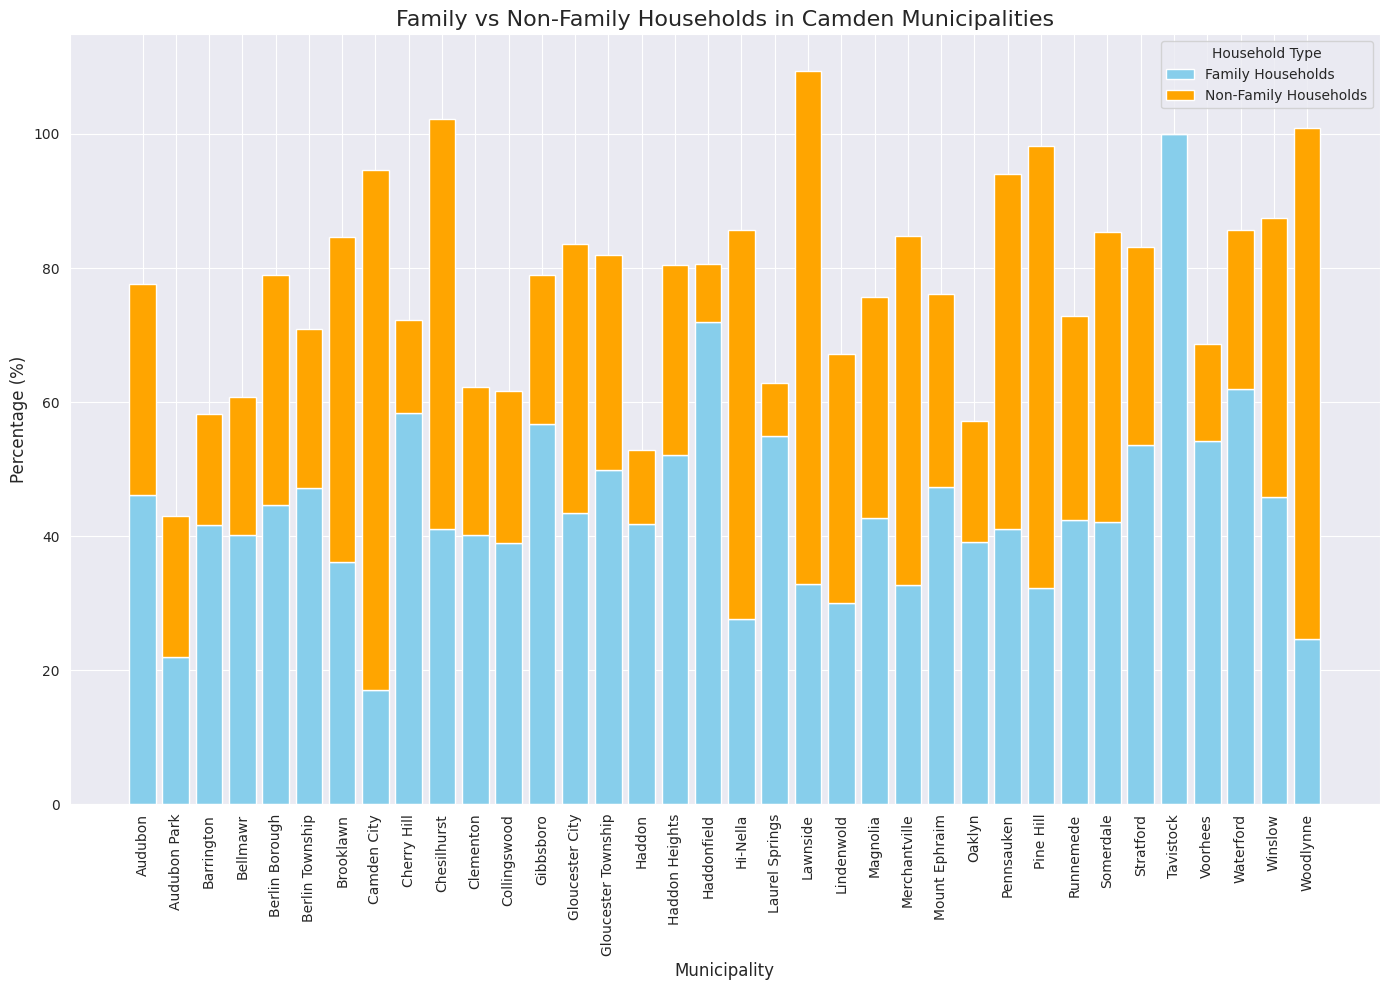

In [44]:
fig, ax = plt.subplots(figsize=(14, 10))

# Data
municipalities = merged_data['Municipality']
family_households = merged_data['Married Couple Family']
nonfamily_households = merged_data['Single Parent Children']

# Plot Family Households
ax.bar(
    municipalities, family_households, label='Family Households',
    color='skyblue', width=0.8
)

# Plot Non-Family Households (stacked on top)
ax.bar(
    municipalities, nonfamily_households, bottom=family_households,
    label='Non-Family Households', color='orange', width=0.8
)

# Add labels and title
ax.set_xlabel('Municipality', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Family vs Non-Family Households in Camden Municipalities', fontsize=16)
ax.legend(title="Household Type", fontsize=10)

# Customize x-axis
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show();


# Findings from Literature Review on Shared Housing

In a research by Yinghua et. al. (2008), over a one year period it was found that shared housing does not appear to affect its users adversely
in most of the dimensions we examined. On the contrary,
in some dimensions it appears to help. Sharing at
3 months is associated with less psychotic symptomology
at12 months. The idea that sharing reduces psychoticsymptomology
has intuitive appeal. Isolation leads people to
dwell on their own internal thinking, while having contact
with others fosters a focus on the interpersonal socialized
world.


# Policy Limitations of Shared Housing

In this research of shared housing as a solution to homelessness in Camden City, three core policy limitations have been identified as barrierrs to the implementation of shared Housing. These are zoning laws, implicit taxes, and concerns over adverse possession.

**Zoning laws** are a major obstacle to shared housing because they typically restrict the types of housing that can be developed in certain areas. Many regions only allow single-family homes, which limits the potential for diverse housing solutions such as multi-family or shared housing units (Fischel, 2001). This exclusionary zoning practice not only prevents lower-income individuals from accessing neighborhoods with better resources but also exacerbates existing housing inequalities (Glaeser, 2017). New Jersey has attempted reforms—like the Mount Laurel decision however, these efforts are often hampered by other restrictions such as limits on building size (Ellen & McCabe, 2018).

**Implicit Taxes**
Implicit taxes present another challenge by imposing financial burdens on property owners who might otherwise consider shared housing arrangements. These can include higher property taxes or additional fees for multi-family units, which increase the cost of offering shared living spaces (O'Sullivan, 2018). Such financial disincentives make shared housing less attractive to landlords, especially when the economic benefits are uncertain.

**Adverse Possession**
Adverse possession allows someone to claim ownership of a property after residing there for an extended period (typically 10-20 years, depending on the state). This can discourage property owners from engaging in long-term shared housing programs. As a result, many property owners are reluctant to engage in shared housing due to the perceived risk of losing control over their assets.


# **Recommendations**


**Landlord engagement as a tool to promote shared housing despite policy limitations**


Engaging landlords is a straightforward and cost-effective strategy to expand shared housing opportunities.

Financial incentives such as lower property taxes or guaranteed rent payment through the Tenant Rental Agreement and  housing vouchers can can help offset perceived risks associated with renting to multiple tenants while laso encourage them to participate in shared housing programs.

Education and support: Providing landlords with training and resources on shared housing can help them understand the benefits and address concerns. This includes workshops on tenant-landlord laws, conflict resolution, and strategies for fostering positive relationships between roommates.

Roommate matching services: Housing organizations can facilitate roommate pairing to reduce housing costs and increase affordability for tenants.

Risk mitigation: Implementing programs that provide landlords with support in case of income loss during move-in delays or damages can alleviate concerns about renting to multiple tenants.

Finally, legal protections for property owners, alongside clearer frameworks for adverse possession, could reduce the uncertainty that discourages landlords from entering shared housing arrangements.


**References**

Ellen, I. G., & McCabe, B. J. (2018). Zoning, housing affordability, and segregation. Urban Studies, 55(13), 2839-2857. https://doi.org/10.1177/0042098018789734

Fischel, W. A. (2001). The economics of zoning laws: A property rights approach to American land use controls. Johns Hopkins University Press.

Glaeser, E. L. (2017). The case for freeing the land market. National Bureau of Economic Research.

He, Y., O'Flaherty, B. A., & Rosenheck, R. A. (2008). Is Shared Housing a Way to Reduce Homelessness?.

Monarch Housing. (2024). Point-in-time count: Camden County, NJ. https://monarchhousing.org/wp-content/uploads/2024/10/Camden-PIT-Report-2024.pdf


O'Sullivan, A. (2018). Urban economics (9th ed.). McGraw-Hill Education.